In [1]:
import os
import sys
import math
sys.path.append(os.getcwd().partition('notebooks')[0])
from src.config_base import GeneralConfig

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
import matplotlib.text as mtext
import matplotlib.gridspec as gridspec
from matplotlib.ticker import FixedLocator
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

In [3]:
from src.data.read_pickle import ReadPickle
from src.filtering.filter_methods import FilterMethods
from src.voltage_capacity_analysis.dva import DVA
from src.visualization.config_visualization import VisualizationConfig, instantiate_matplotlib_parameters, cm2inch
instantiate_matplotlib_parameters()
from src.visualization.colormaps import ColorMaps
from src.visualization.colormaps import ColorMaps

## Data

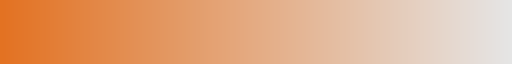

In [4]:
tum_orange_cmap = ColorMaps.orange_tum()
orange_colors = tum_orange_cmap(np.linspace(0,1, 10))
tum_orange_cmap

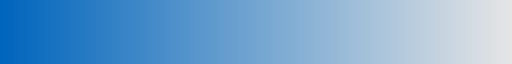

In [5]:
tum_blue_cmap = ColorMaps.blue_tum()
blue_colors = tum_blue_cmap(np.linspace(0,1, 10))
tum_blue_cmap

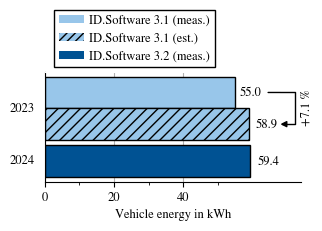

In [6]:
heigth = 6
fig,axes= plt.subplots(1,1,figsize=(VisualizationConfig.columnwidth_in_in.value,
                                cm2inch(heigth)))


width = 0.3  # the width of the bars
offset = width/2
xpos = 0.5
# SOH energy
rects = axes.barh(xpos+ offset, 55, width,color=VisualizationConfig.TUMhellblau.value,edgecolor="k")
rects = axes.barh(xpos - offset, 58.9, width,color=VisualizationConfig.TUMhellblau.value,edgecolor="k",hatch="///")
rects = axes.barh(0 , 59.4, width,color=VisualizationConfig.TUMdunkelblau.value,edgecolor="k")

#spines
axes.spines['top'].set_color('white')
axes.spines['right'].set_color('white')

# tickz
#axes.set_ylim([0-width/2-0.01,1+width+0.01])
axes.set_xlim([0,74])
tick_positions = np.array([0,20,40])
axes.set_xticks(tick_positions)
axes.xaxis.set_minor_locator(FixedLocator([0,10,30,50]))
axes.grid(axis='x')
axes.set_axisbelow(True)
# labels
axes.set_xlabel(r"Vehicle energy in kWh",fontsize=9)
tick_positions = np.array([0,0.5])
axes.set_yticks(tick_positions)
tick_labels = ["2024","2023"]
axes.set_yticklabels(tick_labels,rotation=0,fontsize=9,ha='right',va="center",rotation_mode="anchor")
axes.yaxis.set_ticks_position('none') 
# legend
handles, labels =axes.get_legend_handles_labels()  
patch1 =  Patch(label='ID.Software 3.1 (meas.)', facecolor=VisualizationConfig.TUMhellblau.value)
patch2 =  Patch(label='ID.Software 3.1 (est.)', facecolor=VisualizationConfig.TUMhellblau.value,hatch="////")
patch3 =  Patch(label='ID.Software 3.2 (meas.)', facecolor=VisualizationConfig.TUMdunkelblau.value)
# add manual symbols to auto legend
handles.extend([patch1,patch2,patch3])
lgd = axes.legend(handles=handles,loc="center",fontsize=9,ncols=1,handletextpad=0.4,
           framealpha =1 , fancybox=False,labelspacing=0.5,columnspacing=0.7,edgecolor="black",bbox_to_anchor=(0.35,1.3))
# annotations
axes.annotate("",xy=(66, xpos+width/2), xycoords='data',
                xytext=(66, xpos-width/2), textcoords='data',
                arrowprops=dict(arrowstyle="<|-", #linestyle="dashed",
                                color="0",
                                shrinkA=5, shrinkB=5,
                                patchA=None,
                                patchB=None,
                                connectionstyle="bar,fraction=0.7",))
axes.annotate("",
                xy=(64.5, xpos+width/2), xycoords='data',
                xytext=(68, xpos+width/2), textcoords='data',
                arrowprops=dict(arrowstyle="-", #linestyle="dashed",
                                color="0",
                                shrinkA=0, shrinkB=0,
                                patchA=None,
                                patchB=None))
axes.annotate(text='+7.1 %', xy=(74,xpos+0.01),fontsize=9,rotation=90,ha="left",va="center",bbox=dict(boxstyle='square,pad=0',fc='white', ec='none', alpha=0))
axes.annotate(text='55.0', xy=(55.0+2-0.8,xpos+width/2),fontsize=9,rotation=0,ha="left",va="center",bbox=dict(boxstyle='square,pad=0',fc='white', ec='none', alpha=0))
axes.annotate(text='58.9', xy=(58.9+2,xpos-width/2),fontsize=9,rotation=0,ha="left",va="center",bbox=dict(boxstyle='square,pad=0.2',fc='white', ec='none', alpha=0))
axes.annotate(text='59.4', xy=(59.4+2,0),fontsize=9,rotation=0,ha="left",va="center",bbox=dict(boxstyle='square,pad=0.2',fc='white', ec='none', alpha=0))
plt.tight_layout(rect=(0,0,1,1.1))
fig.savefig(os.path.join(GeneralConfig.path2figures.value,"06-SOH_Def_VW_SUpdf"),bbox_extra_artists=(lgd))
fig.savefig(os.path.join(GeneralConfig.path2figures.value,"06-SOH_Def_VW_SU.png"),dpi=300,bbox_extra_artists=(lgd))

In [7]:
(58.9-55)/55*100

7.090909090909088